In [1]:
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline

Возьмем датасет [отсюда](https://www.kaggle.com/amanajmera1/framingham-heart-study-dataset).

In [2]:
df = pd.read_csv("./data/framingham.csv")

In [8]:
# посмотрим на sample датасета
df.head(7)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1


In [9]:
# посмотрим на признаки и инфу о них
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


df.sample()

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4082 entries, 0 to 4239
Data columns (total 16 columns):
male               4082 non-null int64
age                4082 non-null int64
education          4082 non-null float64
currentSmoker      4082 non-null int64
cigsPerDay         4055 non-null float64
BPMeds             4082 non-null float64
prevalentStroke    4082 non-null int64
prevalentHyp       4082 non-null int64
diabetes           4082 non-null int64
totChol            4034 non-null float64
sysBP              4082 non-null float64
diaBP              4082 non-null float64
BMI                4064 non-null float64
heartRate          4081 non-null float64
glucose            3704 non-null float64
TenYearCHD         4082 non-null int64
dtypes: float64(9), int64(7)
memory usage: 542.1 KB


In [12]:
# посмотрим, есть ли пропущенные значения
df['education'].isna().sum()

105

In [15]:
# что будем делать с NaN-ами?
# что вообще можно с ними делать? (3 варианта)
# выберем то. что не None
df = df[~df['education'].isna()]
df.sample(3)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
747,1,60,1.0,0,0.0,0.0,0,0,0,245.0,119.0,82.0,28.56,70.0,89.0,0
3712,0,42,2.0,0,0.0,0.0,0,0,0,234.0,124.0,80.5,20.06,75.0,NaN,0
1627,0,46,2.0,0,0.0,0.0,0,0,0,244.0,107.5,70.0,22.72,47.0,88.0,0


In [18]:
df['BPMeds'].isna().sum()
df = df[~df['BPMeds'].isna()]

In [21]:
df['cigsPerDay'].isna().sum()
df = df[~df['cigsPerDay'].isna()]

In [22]:
df['totChol'] = df['totChol'].fillna(df['totChol'].median())

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4055 entries, 0 to 4239
Data columns (total 16 columns):
male               4055 non-null int64
age                4055 non-null int64
education          4055 non-null float64
currentSmoker      4055 non-null int64
cigsPerDay         4055 non-null float64
BPMeds             4055 non-null float64
prevalentStroke    4055 non-null int64
prevalentHyp       4055 non-null int64
diabetes           4055 non-null int64
totChol            4055 non-null float64
sysBP              4055 non-null float64
diaBP              4055 non-null float64
BMI                4037 non-null float64
heartRate          4054 non-null float64
glucose            3681 non-null float64
TenYearCHD         4055 non-null int64
dtypes: float64(9), int64(7)
memory usage: 538.6 KB


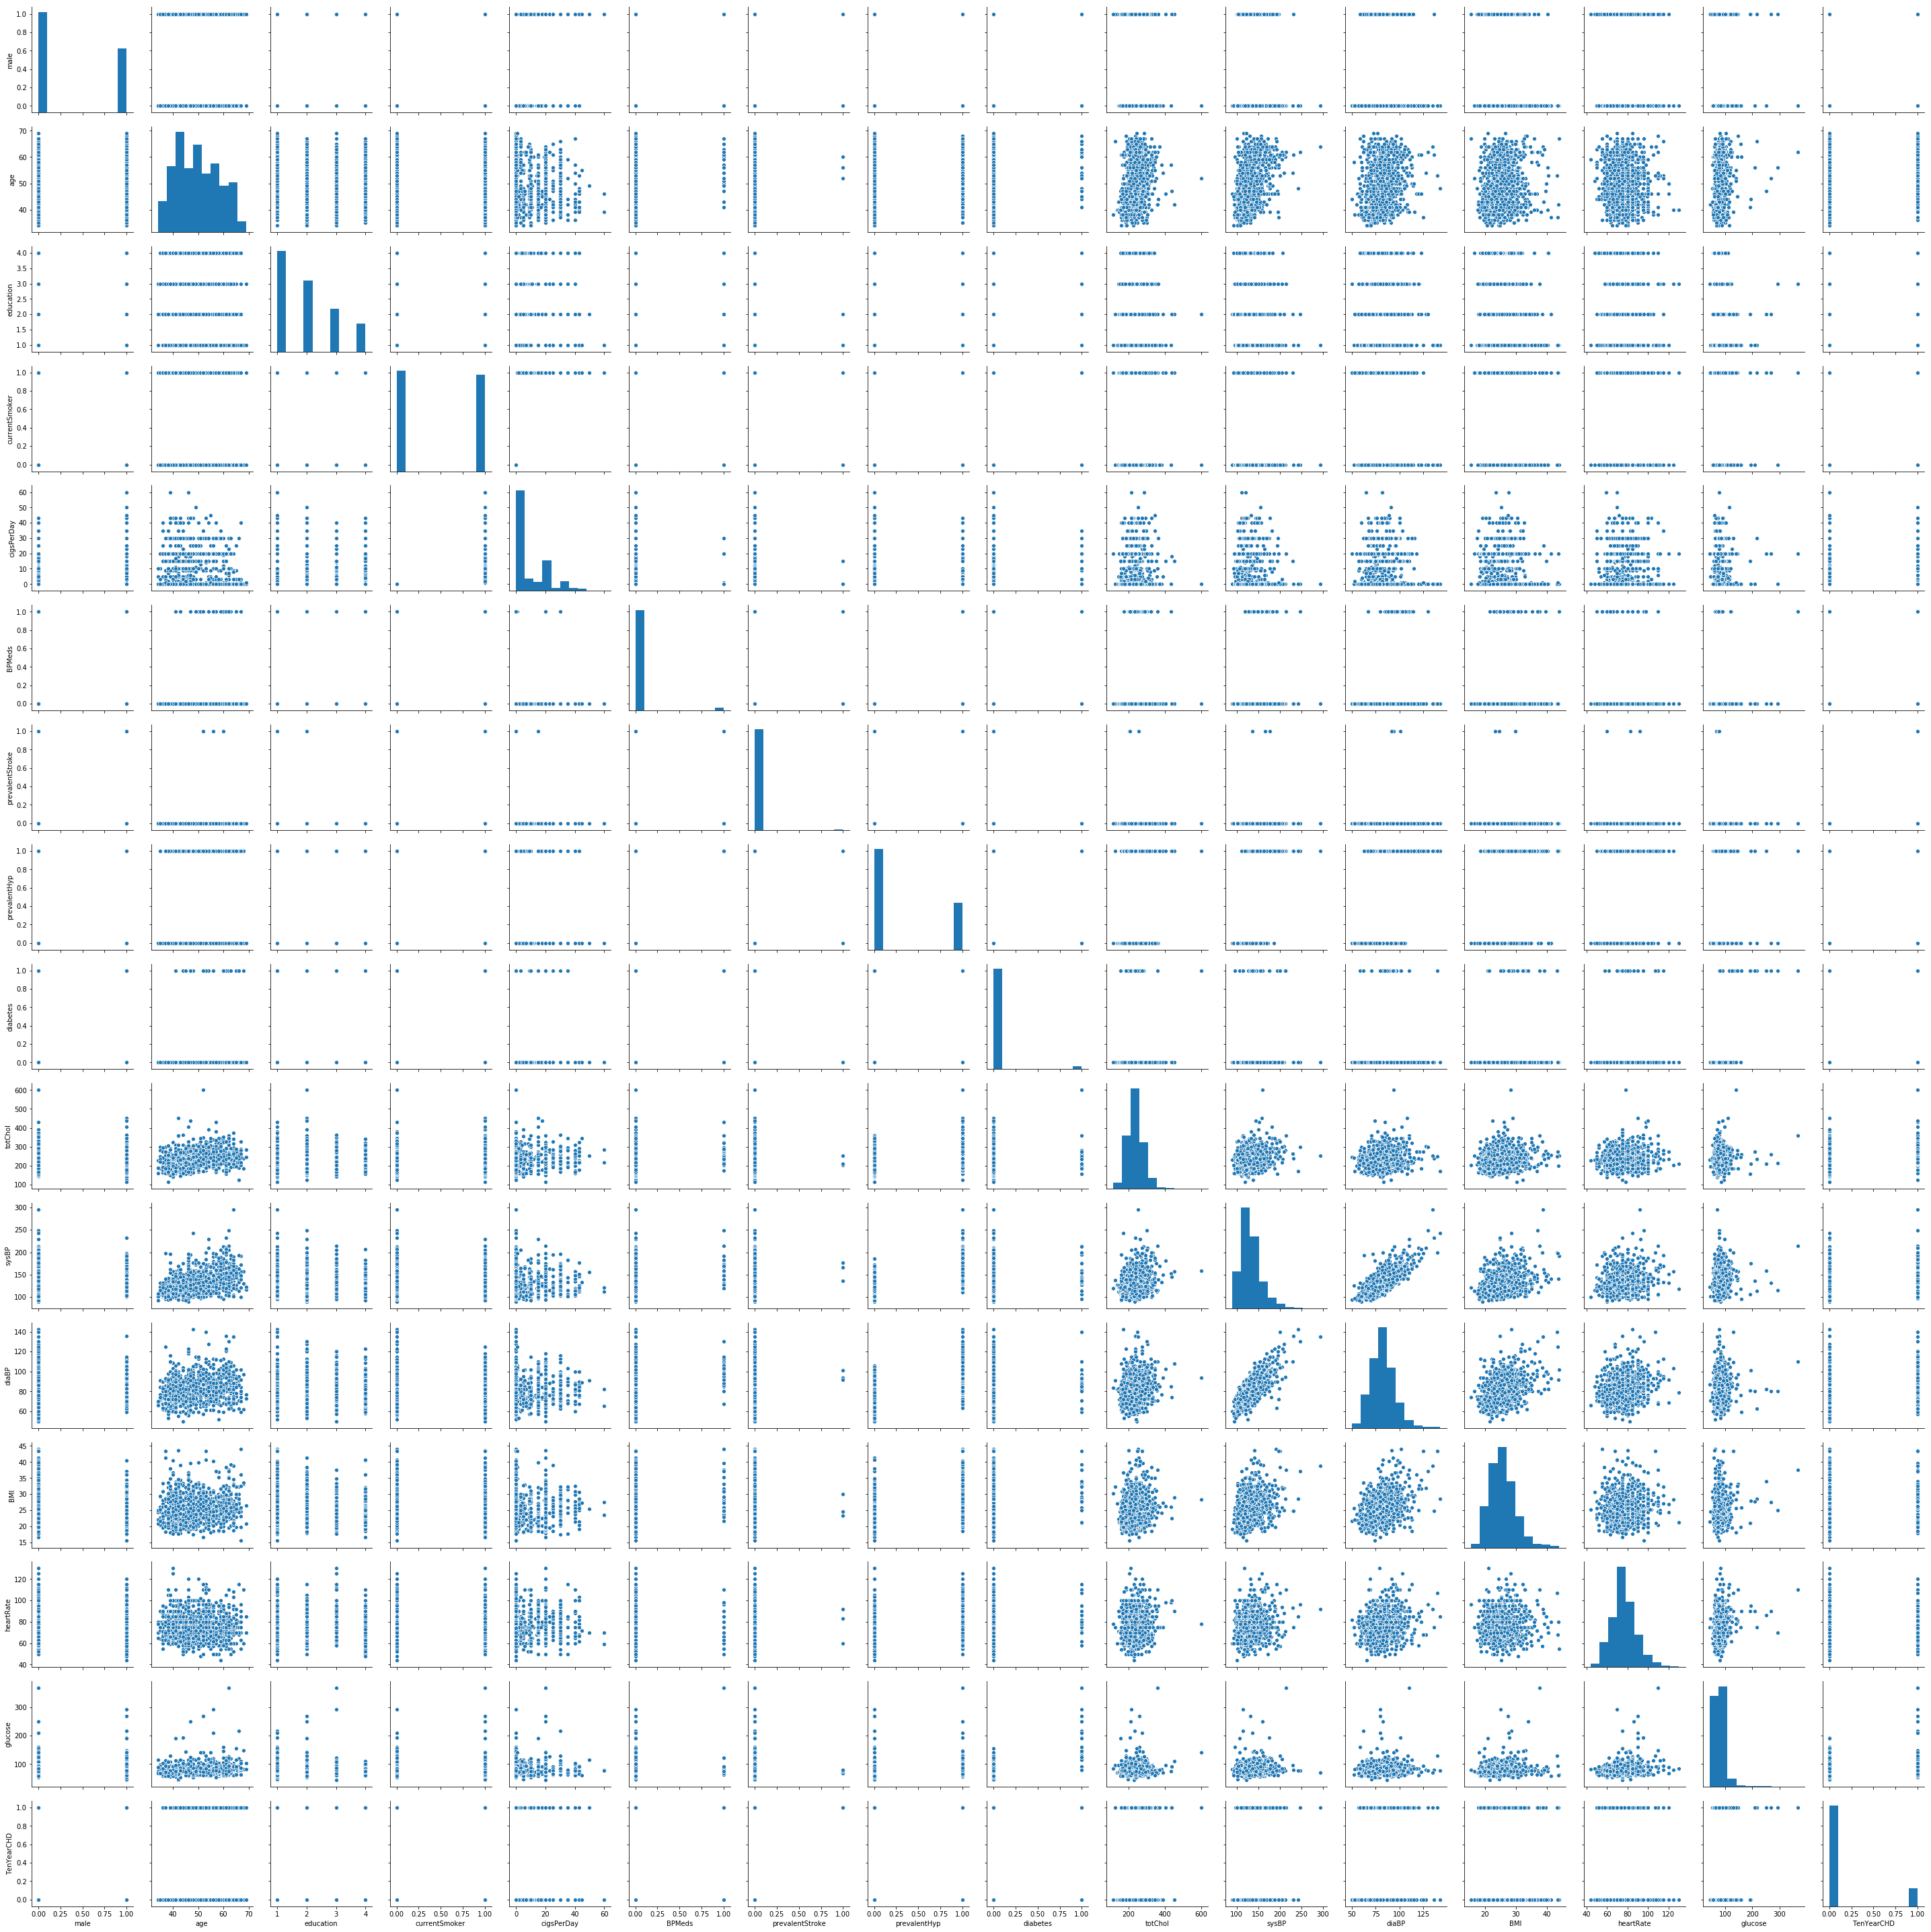

In [31]:
sns.pairplot(df.sample(n=10**3))

C:\Users\Public\Anaconda\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Public\Anaconda\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


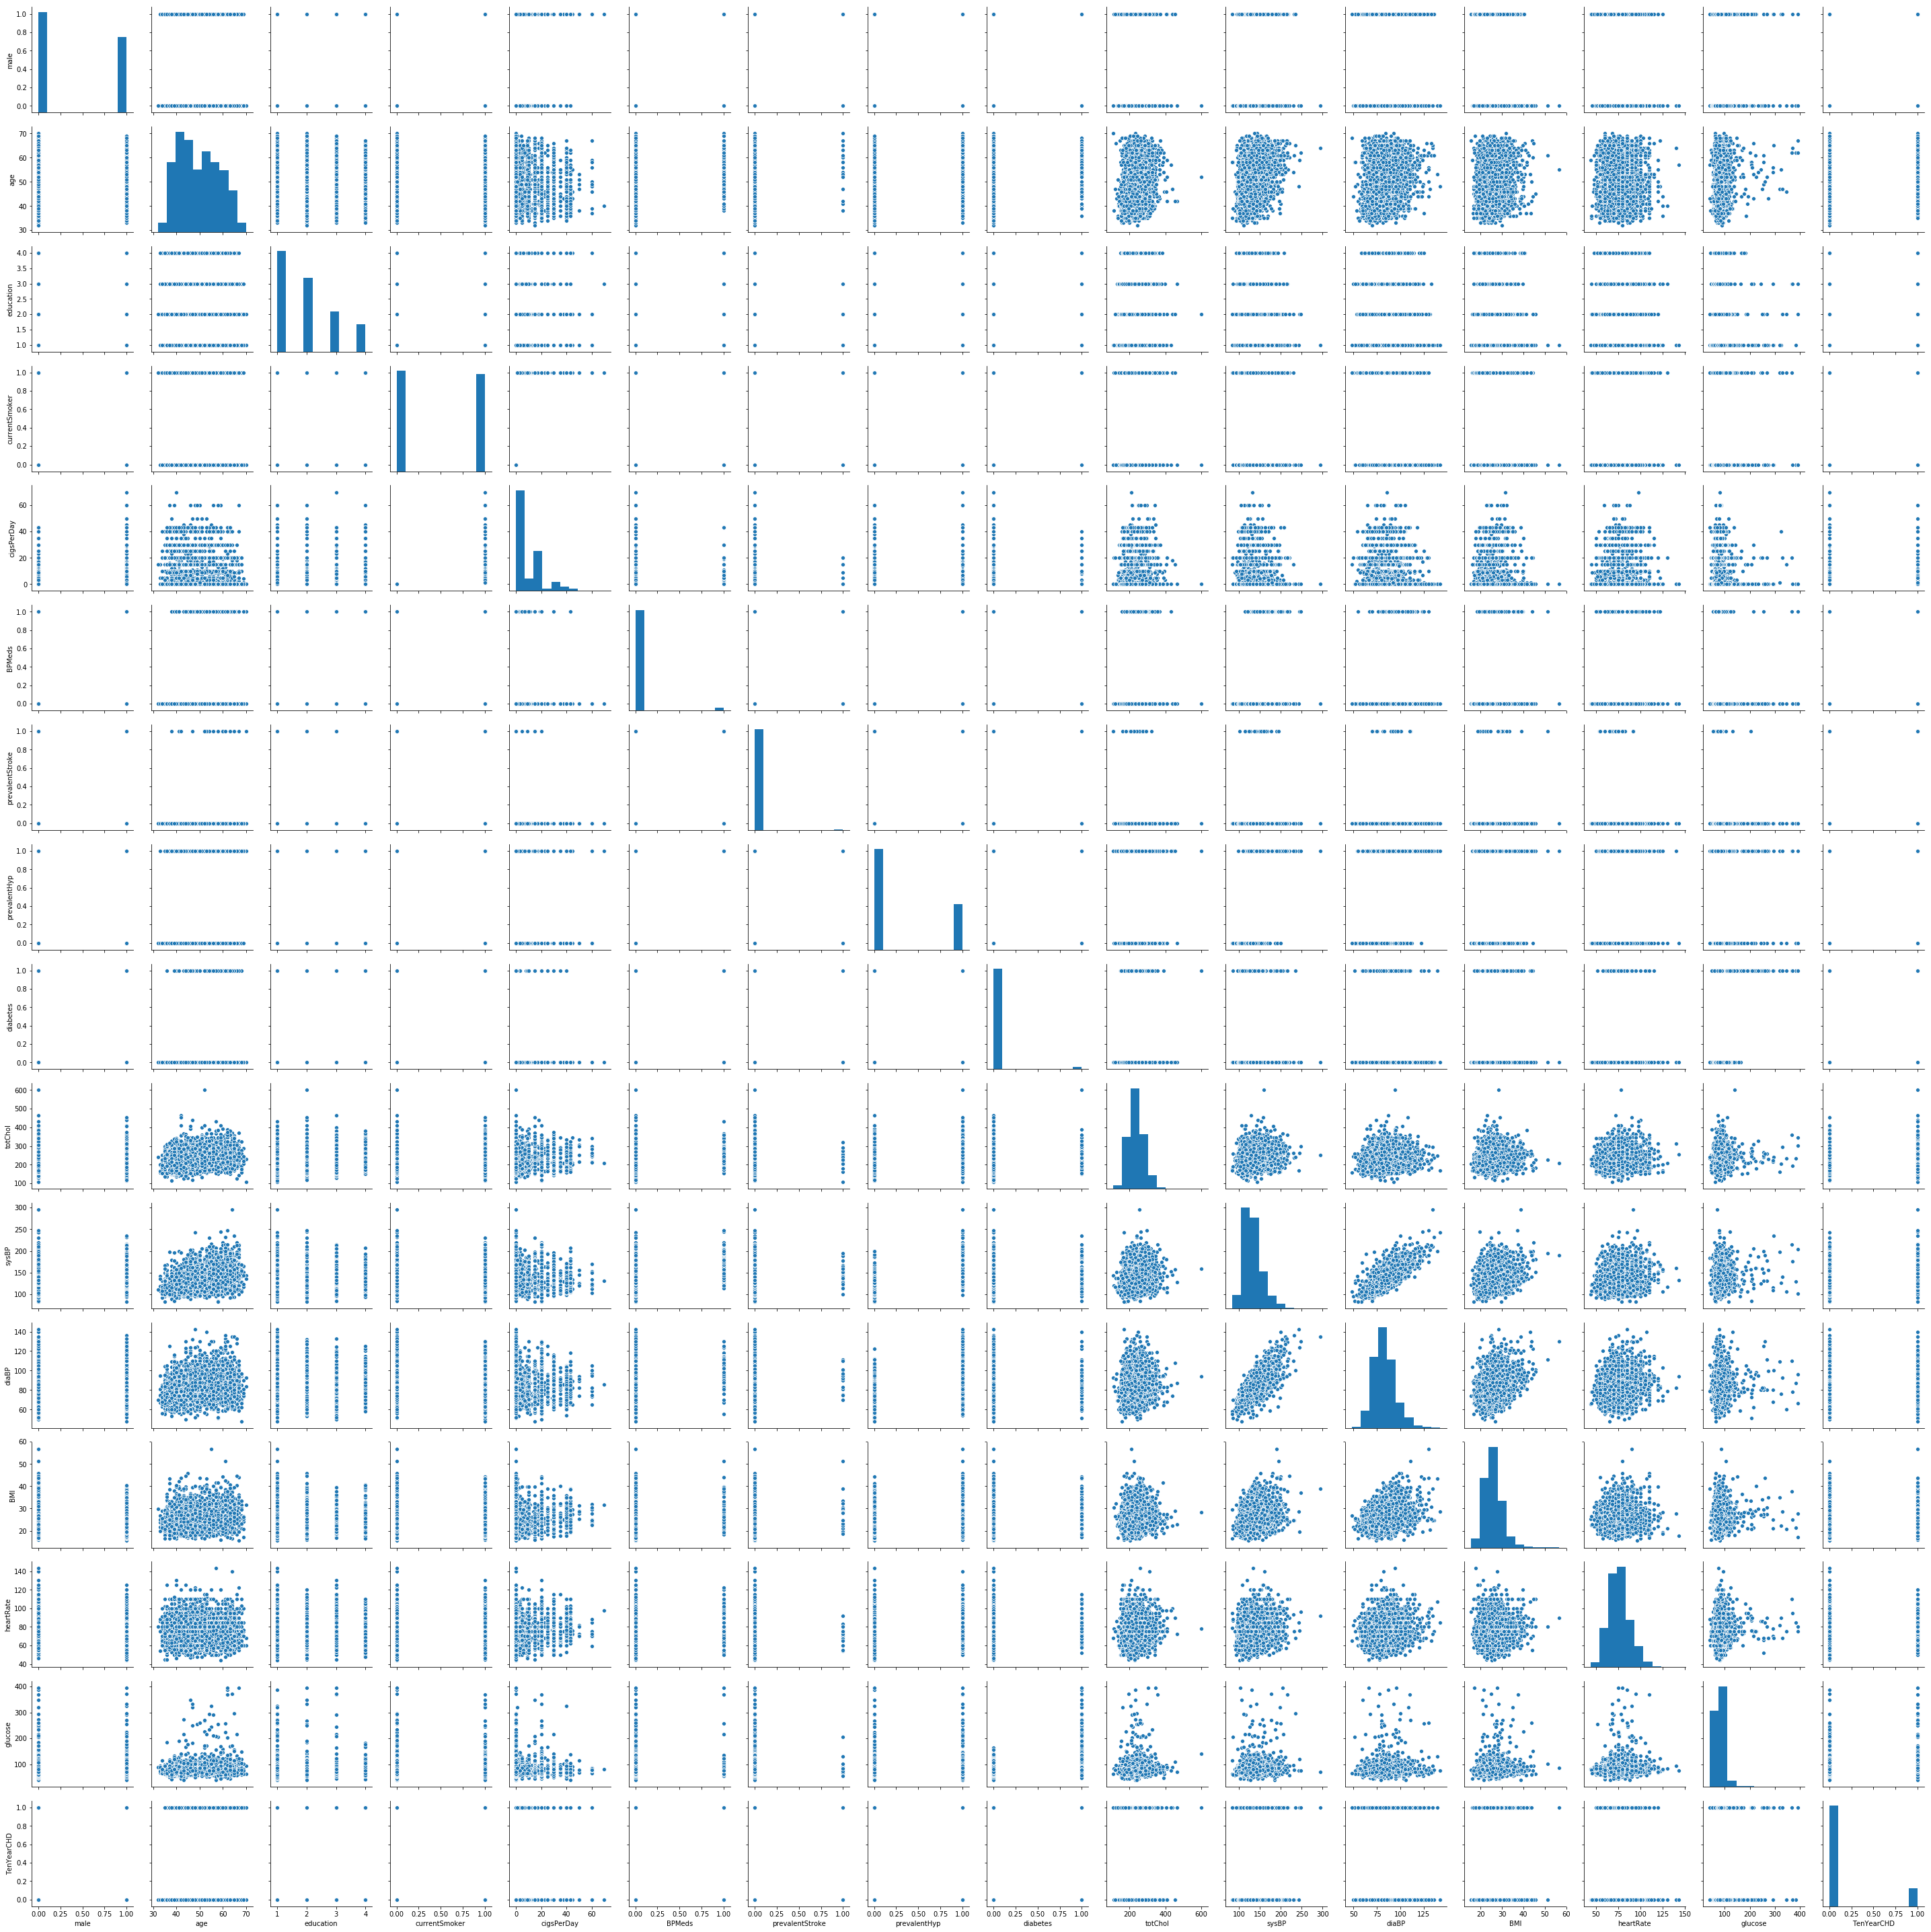

In [30]:
# посмотрим на распределения значений признаков (и таргета)
sns.pairplot(df)

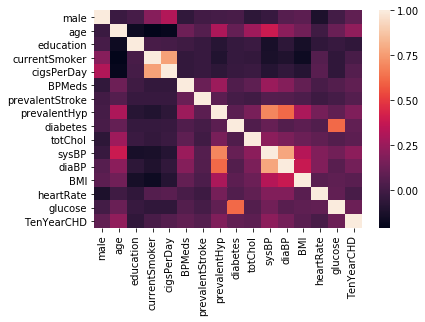

In [32]:
# посмотрим на корреляцию между признаками
sns.heatmap(df.corr())

In [33]:
# решили удалить какие-то пропуски
df.drop(['currentSmoker', 'diaBP'], axis=1, inplace=True)

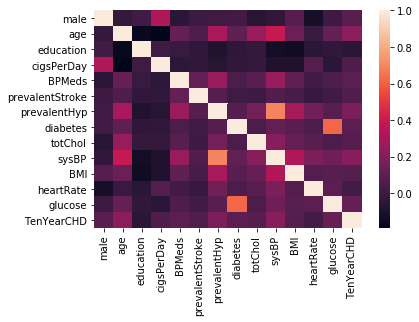

In [34]:
sns.heatmap(df.corr())

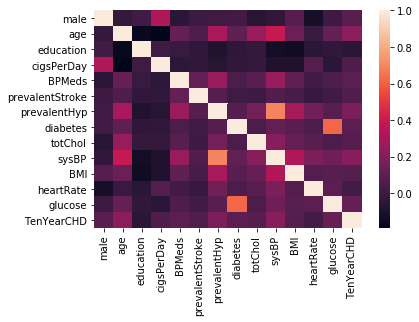

In [35]:
# посмотрим на "взаимодействия" признаков
sns.heatmap(df.corr())

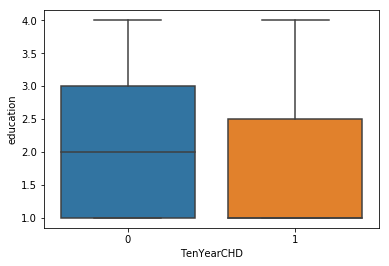

In [37]:
# что такое boxplot? (показывают среднее значения, медианы и т.п.)
# посмотрим на него (них)
# хотим узнать важность фитчи (в приницпе мы это и по корреляции можем видеть мб)
sns.boxplot(x=df['TenYearCHD'], y=df['education'])

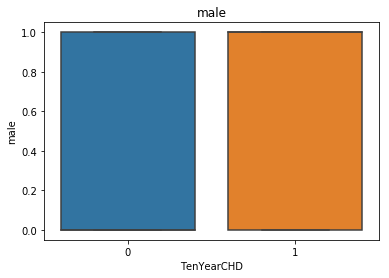

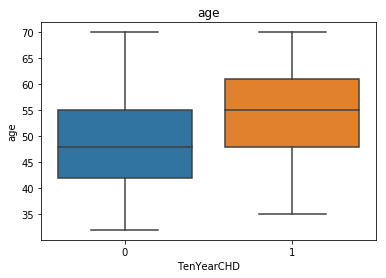

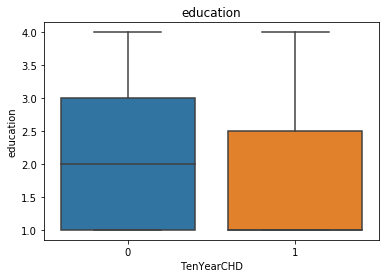

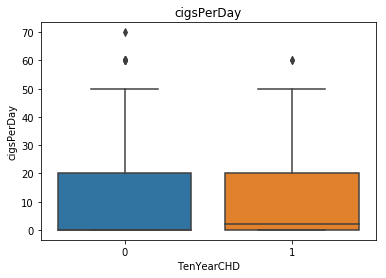

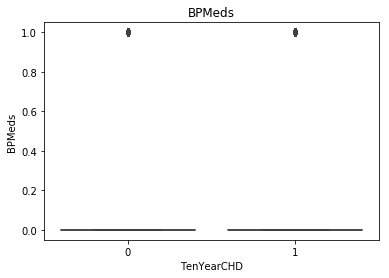

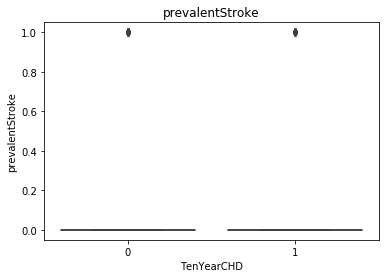

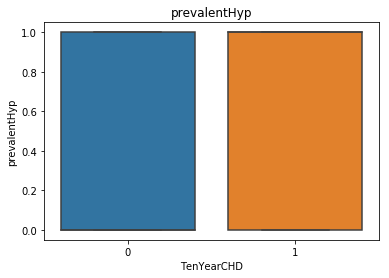

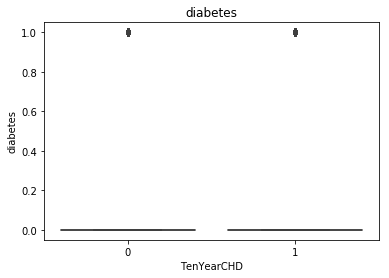

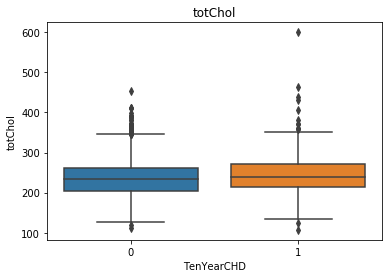

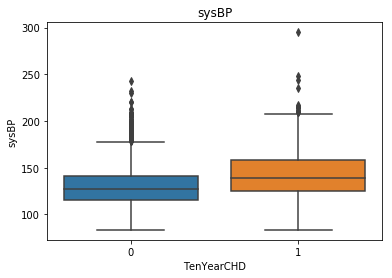

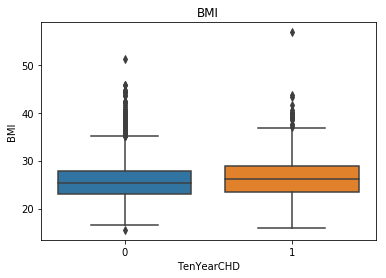

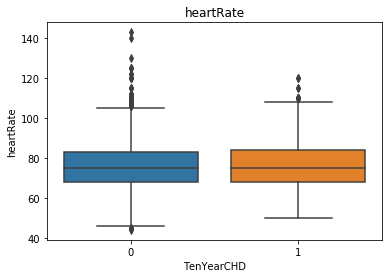

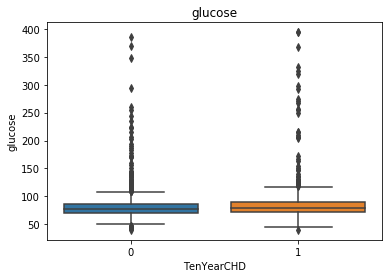

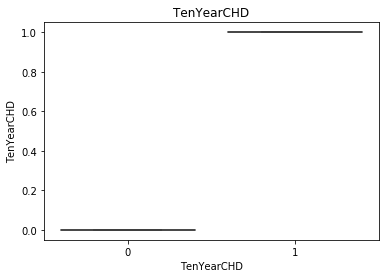

In [46]:
for feature in df.columns:
    # выведем для всех фитчей боксплоты
    plt.title(feature)
    sns.boxplot(x=df['TenYearCHD'], y=df[feature])
    plt.show()

In [38]:
# выполним нормализацию (зачем она, кстати, нужна)? (для logreg нужна была бы)

In [47]:
# разделим данные на train и test
df.sample(5)
from sklearn.model_selection import train_test_split

In [49]:
X_train, x_test, y_train, y_test = train_test_split(df.drop(['TenYearCHD'], axis=1), df['TenYearCHD'], test_size=0.33, random_state=42)

In [50]:
# поработаем с категориальными признаками
from sklearn.preprocessing import OneHotEncoder

In [51]:
encoder = OneHotEncoder()

In [ ]:
df = df.

In [ ]:
pd.concat(
pd.DataFrame(encoder.fit_transform(df['education'], values_reshape=(-1, 1)).todense()),
)

In [ ]:
# обучим модель

In [55]:
from sklearn.ensemble import GradientBoostingClassifier
import lightgbm

ModuleNotFoundError: No module named 'lightgbm'

In [56]:
model = lightgbm.LGBMClassifier()

NameError: name 'lightgbm' is not defined

model.fit(X_train, y_train)

In [ ]:
# оценим качество